<a href="https://colab.research.google.com/github/cboychinedu/Notebooks/blob/master/Clustering_Sound_Waves_data_Using_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3 

<ul> 
<li> Author: Mbonu Chinedum</li> 
<li> Description: Clustering Sound Waves Data Using Unsupervised Learning 'Buhari Tenor' </li> 
<li> Date Created: 05/02/2021</li> 
<li> Date Modified: 06/02/2021</li> 
<br>
</ul> 

<h4 style="margin-left: 30px;"> References </h4> 
<p style="margin-left: 30px;"> <b> link: </b> <a style="margin-left: 30px;" href='https://www.kaggle.com/rockingromio/spectrogram-and-mfccs' > Kaggle Kernels </a> </p> <br> 

<p style="margin-left: 30px;"> <b> link: </b> <a style="margin-left: 30px;" href='https://colab.research.google.com/drive/1Adcy25HYC4c9uSBDK9q5_glR246m-TSx#scrollTo=IAkNksmyw1OD' > Tf_audio_signal Notebook </a> </p> <br> 

<p style="margin-left: 30px;"> <b> link: </b> <a style="margin-left: 30px;" href="https://builtin.com/data-science/unsupervised-learning-python" > builtin.com (Unsupervised Learning) </a> </p> <br> 




In [16]:
# Installing the necessary modules 
!pip install librosa -q 
!apt-get install ffmpeg -y 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [18]:
# Checking the version of ffmpeg 
!ffmpeg -version 

# Connecting to google drive 
from google.colab import drive
drive.mount('/content/drive')

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzmq 

In [393]:
# Importing the necessary modules 
import os 
import wave 
import librosa 
import numpy as np 
import pandas as pd
import librosa.display 
import tensorflow as tf 
import plotly.express as px 
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


%matplotlib inline 

In [107]:
 # Downloading the wav file 
 !wget 'https://wav-sounds.com/wp-content/uploads/2017/09/Parody-01.wav' 

 # Renaming the file 
 !mv 'Parody-01.wav' 'audio.wav' 

 # Displaying the file 
 !ls -ltr 

--2021-02-06 05:21:55--  https://wav-sounds.com/wp-content/uploads/2017/09/Parody-01.wav
Resolving wav-sounds.com (wav-sounds.com)... 160.153.16.40
Connecting to wav-sounds.com (wav-sounds.com)|160.153.16.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128250 (125K) [audio/x-wav]
Saving to: ‘Parody-01.wav’

Parody-01.wav       100%[===================>] 125.24K   386KB/s    in 0.3s    

2021-02-06 05:21:55 (386 KB/s) - ‘Parody-01.wav’ saved [128250/128250]

total 132
-rw-r--r-- 1 root root 128250 Sep 16  2017 audio.wav
drwxr-xr-x 1 root root   4096 Feb  4 15:26 sample_data


In [108]:
# Playing the Audio wav file 
Audio("audio.wav")

In [ ]:
# Downloading the sound data 
!wget 'https://github.com/karoldvl/ESC-50/archive/master.zip'  

# Unzipping the file 
!unzip -o 'master.zip'

In [155]:
# changing the name of the directory 
!mv 'ESC-50-master' 'dataDirectory'
!rm -rf 'master.zip' 

# listing the dir 
!ls -ltr 

total 136
-rw-r--r-- 1 root root 128250 Sep 16  2017 audio.wav
drwxr-xr-x 7 root root   4096 Feb  3 09:23 dataDirectory
drwxr-xr-x 1 root root   4096 Feb  4 15:26 sample_data


In [167]:
# Reading the csv file into memory 
sound_file = "dataDirectory/meta/esc50.csv"
sound_df = pd.read_csv(sound_file) 

# Viewing the head of the dataframe 
sound_df.head() 

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [168]:
# Reading the actual sound using the sound_df dataframe 
sound_df.shape

(2000, 7)

In [208]:
# Entries count 
sound_df.count() 

filename    2000
fold        2000
target      2000
category    2000
esc10       2000
src_file    2000
take        2000
dtype: int64

In [210]:
# Sound data description 
sound_df.describe() 

,fold,target,src_file
count,2000.000000,2000.000000,2000.000000
mean,3.000000,24.500000,137696.797500
std,1.414567,14.434479,64882.993641
min,1.000000,0.000000,137.000000
25%,2.000000,12.000000,87726.250000
50%,3.000000,24.500000,143745.500000
75%,4.000000,37.000000,188215.000000
max,5.000000,49.000000,264453.000000


In [211]:
# Unique values for the categories 
sound_df['category'].unique() 

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [212]:
# Displaying the count for the categories/classes of sounds 
print("Sound Category Count: ", len(sound_df['category'].unique()))   

Sound Category Count:  50


In [227]:
y.shape

(110250,)

In [367]:
# Creating an empty array to hold value for the data and label 
data = list() 
label = list() 
name = list() 

# Pulling out the sound wave data from its directory location 
for index, row in sound_df.iterrows():
  # if len(data) == 400:
  #   break 

  # Getting the full path to the sound wave file 
  fullpath = os.sep.join(['dataDirectory/audio', row['filename']])

  # loading the wav file into memory with a sample rating of "22050"
  y, sr = librosa.load(fullpath, sr=22050) 
  # y = y[:100000]

  # Getting the tag 
  tag = row['category']

  # Getting the name of the file 
  file_name = row['filename']

  # Saving the values for the wav file into an empty list for INPUT and OUTPUT
  data.append(y) 
  label.append(tag) 
  name.append(file_name) 


# Converting the loaded data into numpy arrays 
XINPUT = np.array(data) 
YINPUT = np.array(label) 
NAME = np.array(name) 

# Displaying the number of file loaded into memory 
print(f"Loaded Wav file: {len(data)}")

Loaded Wav file: 2000


In [368]:
# Converting the numpy array into a dataframe 
X_df = pd.DataFrame(XINPUT); 

# Creating the names column from the 'YINPUT' array   
Y_df = pd.DataFrame(YINPUT)

# Creating the file_name column 
file_name_df = pd.DataFrame(name) 

# Viewing the head of X_df dataframe 
X_df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110210,110211,110212,110213,110214,110215,110216,110217,110218,110219,110220,110221,110222,110223,110224,110225,110226,110227,110228,110229,110230,110231,110232,110233,110234,110235,110236,110237,110238,110239,110240,110241,110242,110243,110244,110245,110246,110247,110248,110249
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.029419,-0.136887,-0.083380,-0.037742,0.016421,0.148610,0.173932,0.024054,-0.150861,-0.067920,0.018327,0.054934,0.129399,0.095999,-0.048304,-0.124394,-0.024384,0.035869,0.085212,0.059746,-0.027464,-0.055754,-0.095591,-0.075806,0.008798,0.090264,0.055441,0.013889,0.033524,-0.004638,0.010956,0.092310,0.060534,-0.044350,-0.023444,0.024019,-0.051906,-0.055429,-0.010123,-0.033932,...,0.015335,-0.006801,-0.008569,-0.027085,-0.043197,-0.033474,-0.012914,0.009170,0.032383,0.017087,-0.040571,-6.727276e-02,-0.039416,-0.004837,0.024945,0.026110,-0.000373,0.019277,0.018770,-0.023789,-0.017131,0.016209,0.049236,0.064147,0.018862,-0.034092,-0.030987,-0.005376,-0.000627,0.021102,0.029601,-0.000492,0.001645,0.029018,-0.010839,-0.052788,-0.019145,0.029886,0.075655,0.038617
2,-0.006616,-0.011910,-0.003040,-0.007528,-0.002895,-0.003460,-0.011761,-0.006666,-0.017010,-0.016293,0.000134,0.002455,-0.003071,-0.009602,-0.014565,-0.013690,-0.019260,-0.028297,-0.029756,-0.025931,-0.026932,-0.036218,-0.042753,-0.052751,-0.066038,-0.079903,-0.102743,-0.116643,-0.114856,-0.115849,-0.113349,-0.105372,-0.089587,-0.064403,-0.053110,-0.049947,-0.032017,-0.017825,-0.021692,-0.029672,...,-0.228927,-0.359925,-0.378815,0.058616,-0.044320,-0.253874,-0.241329,0.164151,0.130801,-0.114321,-0.116400,2.380482e-01,0.431859,-0.019302,-0.270922,-0.344214,0.082578,0.036641,-0.228853,-0.251322,-0.017898,-0.101397,-0.243230,-0.332627,-0.241084,0.127561,-0.140420,-0.159861,-0.194150,0.244329,0.309229,-0.142100,-0.151122,0.234223,0.513972,0.318330,-0.025794,-0.011302,0.359208,-0.057457
3,0.379414,0.296188,0.175034,0.708208,0.620493,0.375257,0.146950,0.398895,0.684870,0.310942,0.001032,0.242103,0.607161,0.290234,-0.203869,-0.265414,0.513935,0.820868,0.278896,-0.028247,0.306463,0.799966,0.584974,0.156702,0.355408,0.799964,0.640975,0.253040,-0.007115,0.521233,0.656091,0.253466,0.090985,0.208070,0.596327,0.333334,-0.191417,-0.098166,0.428291,0.438629,...,0.189141,0.013904,-0.010756,0.181378,0.243133,0.002636,-0.132885,-0.012297,-0.022230,-0.141040,-0.099927,7.694693e-02,0.073363,-0.082215,-0.058807,0.083115,0.029729,-0.195646,-0.121605,0.102052,0.095343,-0.071490,-0.060261,0.166613,0.118313,-0.069367,-0.004560,0.181023,0.135084,-0.049869,-0.009011,0.044367,-0.011805,-0.108585,0.002974,0.194725,0.088202,-0.063232,0.030824,0.113619
4,-0.000372,-0.000772,0.000297,0.001063,0.001799,0.002011,0.002008,0.001376,0.000323,-0.000981,-0.001671,-0.000624,-0.000032,0.000535,0.001569,0.001454,0.001724,0.002930,0.002848,0.003592,0.003017,0.001521,0.001827,0.001772,0.003415,0.003336,0.002383,0.002715,0.002840,0.003147,0.002045,0.001730,0.001444,0.001277,0.001427,0.002297,0.001689,0.001124,0.002920,0.002750,...,-0.001227,-0.001124,-0.001937,-0.001413,-0.001075,-0.001483,-0.001160,-0.000779,0.000090,0.000472,-0.000052,-9.420366e-07,-0.000113,-0.000646,-0.000177,0.000264,0.000160,-0.000557,-0.

In [369]:
# Viewing the head of Y_df dataframe 
Y_df.head() 

,0
0,dog
1,chirping_birds
2,vacuum_cleaner
3,vacuum_cleaner
4,thunderstorm


In [370]:
# Viewing the head of the file_name_df dataframe 
file_name_df.head() 

,0
0,1-100032-A-0.wav
1,1-100038-A-14.wav
2,1-100210-A-36.wav
3,1-100210-B-36.wav
4,1-101296-A-19.wav


In [371]:
# Displaying the shape of the data
print("Sound Data Shape: ", X_df.shape) 
print("Label Data Shape: ", Y_df.shape)
print("File Name Data Shape: ", file_name_df.shape) 

Sound Data Shape:  (2000, 110250)
Label Data Shape:  (2000, 1)
File Name Data Shape:  (2000, 1)


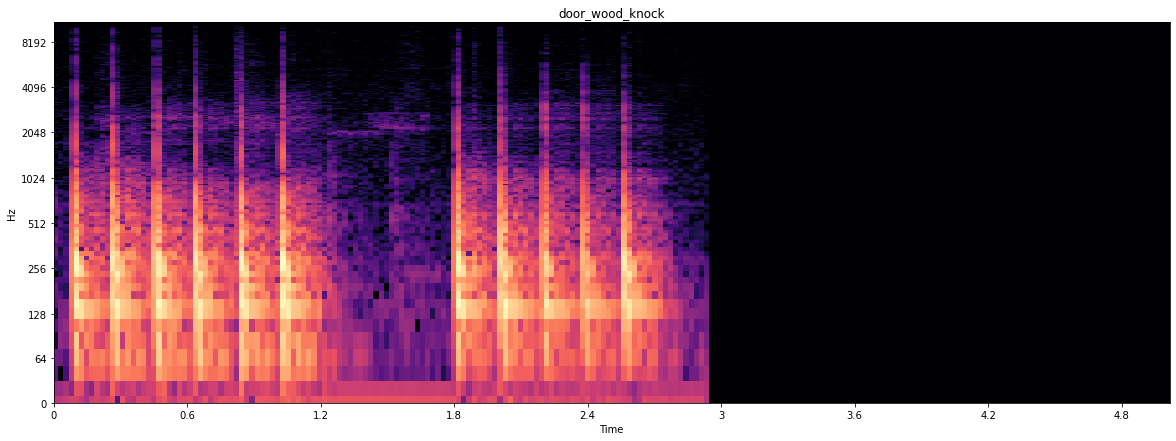

In [372]:
# Setting the height and width 
plt.figure(figsize=(20, 7)) 

# loading the wav file into memory 
# y, sr = librosa.load(audio_file); 

# Setting the window size 
window_size = 1024 
window = np.hanning(window_size) 
stft = librosa.core.spectrum.stft(data[6], n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window) 

# Setting the figure  
fig = plt.Figure() 
canvas = FigureCanvas(fig) 

# Displaying the spectrogram plot 
librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), y_axis='log', x_axis='time')

# Showing the plot
plt.title(label[6]) 
plt.show()

In [373]:
# Getting the full path to an audio file with index 6 from the name array 
fullpath = os.sep.join(['dataDirectory/audio', name[6]]) 

# Getting its actual tag 
fullpath_tag = label[6]
print(fullpath_tag)
print(fullpath + "\n\n")

# Displaying the audio file for playing. 
Audio(fullpath)

door_wood_knock
dataDirectory/audio/1-101336-A-30.wav




In [374]:
# Saving the plot 
ax = fig.add_subplot(111) 
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
fig.savefig('spectrogram.png')

<h3> <b> Wave Plot </b> </h3> 

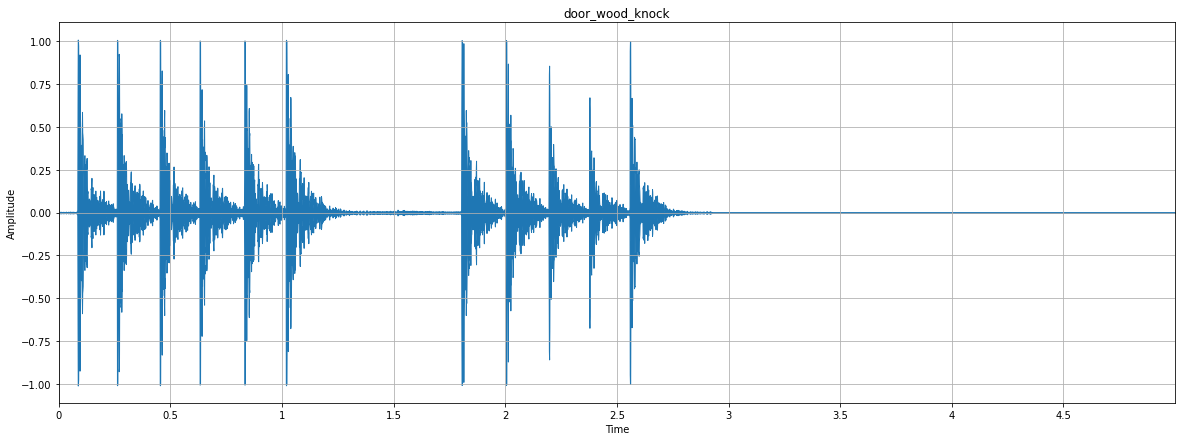

In [375]:
# Setting the height and width 
plt.figure(figsize=(20, 7))
plt.grid(True) 

# Displaying the wave plot for the audio file 
librosa.display.waveplot(data[6], sr) 

# Setting the labels 
plt.title(label[6])
plt.xlabel('Time') 
plt.ylabel('Amplitude') 

# Displayig the plot 
plt.show() 

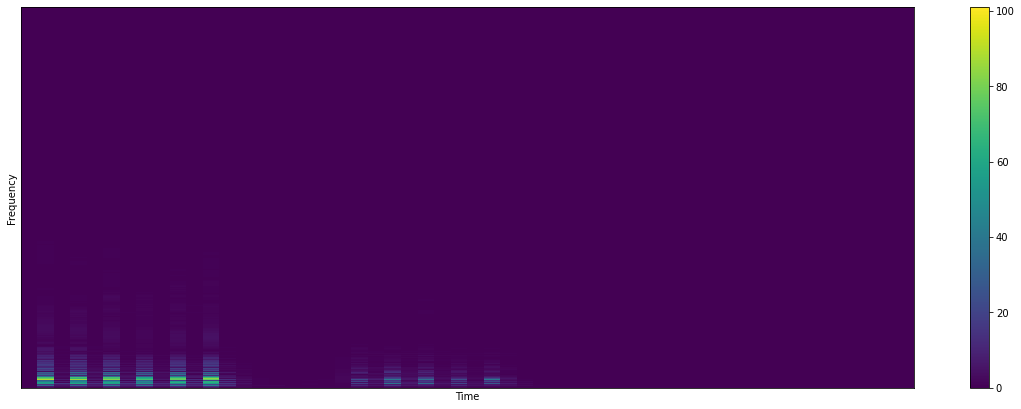

In [376]:
# Setting the height and width 
plt.figure(figsize=(20, 7))
plt.grid(True) 

# Specifying the fast fourier transforms shift as "2048"
n_fft = 2048 

# Setting the hop length ( How much do we have to shift ) 
hop_length = 2048 
stft = librosa.core.stft(data[6], hop_length=hop_length, n_fft=n_fft) 
spectrogram = np.abs(stft) 

# Converting the spectrogram values into db scaled spectrogram 
log_specfrogram = librosa.amplitude_to_db(spectrogram) 

# 
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length) 
plt.xlabel("Time") 
plt.ylabel("Frequency") 

# 
plt.colorbar() 
plt.set_cmap("viridis") 
plt.show() 

<h4> Log Spectrogram </h4> 

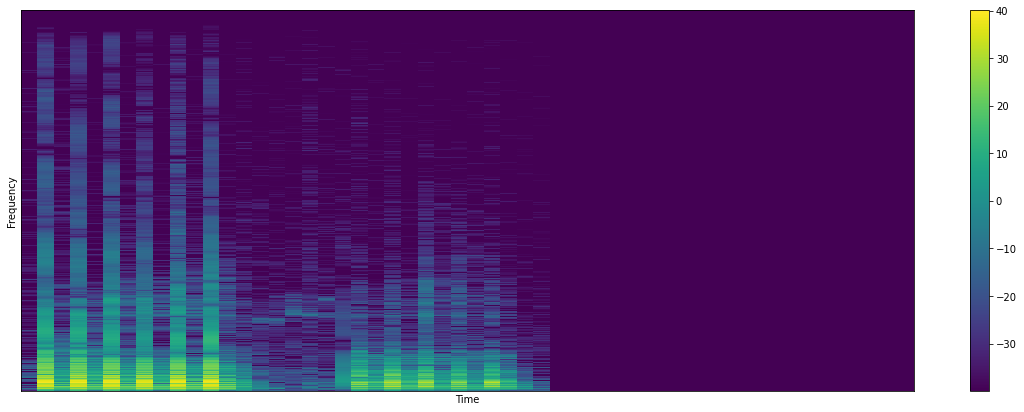

In [377]:
# Setting the height and width 
plt.figure(figsize=(20, 7))
plt.grid(True)  

# 
librosa.display.specshow(log_specfrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.set_cmap("viridis") 
plt.colorbar() 

# Displaying the plot 
plt.show() 

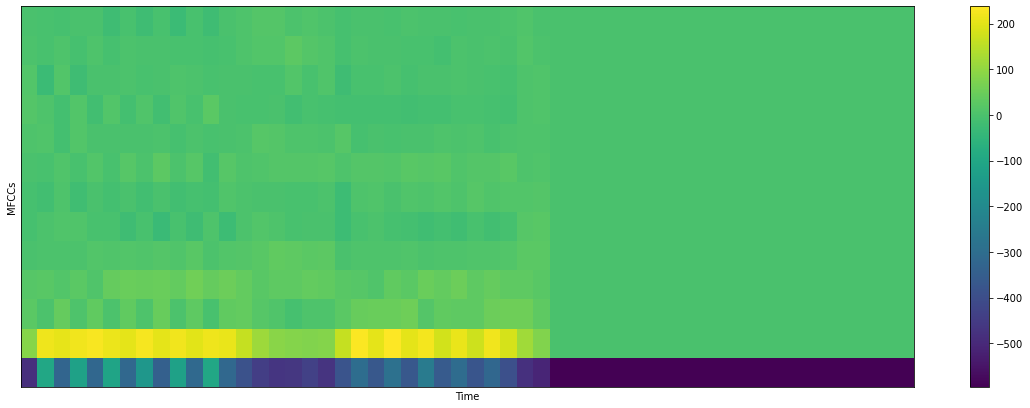

In [378]:
# Setting the height and width 
plt.figure(figsize=(20, 7))
plt.grid(True)

# 
MFCCs = librosa.feature.mfcc(data[6], n_fft=n_fft, hop_length=hop_length, n_mfcc=13) 
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length) 
plt.ylabel("MFCCs") 
plt.xlabel("Time")
plt.set_cmap("viridis") 
plt.colorbar() 
plt.show() 

<h2 style="color: red;"> <b> UNSUPERVISED LEARNING SECTION </b> </h2>



<p> 
  Unsupervised learning is a machine learning algorithm what searches for previously unknown patterns within a data set containing no labeled responses and without human interaction. The most prominent methods of unsupervised learning are <b> cluster analysis </b> and <b> principal component analysis </b> 





</p> 

<div> 
<img style="height: 400px; width: 800px;" src="https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/supervised-vs-unsupervised-learning.png" > 

</div> 

<h4> Important Terminology </h4> 
<ul> 
<li> <b> Feature: </b> An input variable used in making predictions. </li> 
<br> 
<li> <b> Predictions: </b> A model's output when provided with an input example. </li> 
<br> 
<li> <b> Example: </b> One row of a dataset. An example contains one or more features and possibly a label </li> 
<br> 
<li> <b> Label: </b> The result of the feature </li> 
</ul> 


<h2> <b> K-Means Clustering </b> </h2> 

<h3> Clustering </h3> <br> 

<div> 
<img src="https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/clustered-data-unsupervised-learning.jpeg" > 
</div> 

<p> In clustering, the data is divided into several groups with similar traits. <br> 
In the image above, the left is raw data without classification, while the right is clustered based on its features. 
<br> 
When an input is given which is to be predicted then it checks in the cluster it belongs to based on its features, and the prediction is made.  

In [379]:
# Building a model with clusters number of unique values 
# found in the label array  
model = KMeans(n_clusters=len(np.unique(label)))       # Important section 

# Fitting the model 
transformed = model.fit_transform(X_df) 

In [380]:
# Using label encoder 
lb = LabelEncoder() 

# Scaling the species column 
Y_df['encoded_value'] = lb.fit_transform(Y_df[0]) 

# Plotting the 2d T-SNE 
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]


# Creating a list to hold the values for the names of the flowers 
speciesArr = list() 

# Getting the actual value for the names of the flowers in the species column 
for values in Y_df['encoded_value']:
  values = lb.classes_[values]
  speciesArr.append(values) 


# Using plotly 
fig = px.scatter(x=x_axis, y=y_axis, color=pd.Series(speciesArr)) 
fig.update_layout(
    margin=dict(l=8, r=8, t=8, b=8), 
    paper_bgcolor="LightSteelBlue", 
)

# Displaying the plot 
fig.show()

In [385]:
lb.classes_[model.predict(data[1].reshape(1, -1))] 

array(['chainsaw'], dtype=object)

In [391]:
len(speciesArr)

150

<h2> <b> T-SNE CLUSTERING </b> </h2> 

In [396]:
# Building the model 
model = TSNE(learning_rate=100)

# fitting the model 
transformed = model.fit_transform(X_df)

# Plotting the 2D t-sne 
x_axis = transformed[:, 0]; 
y_axis = transformed[:, 1]; 

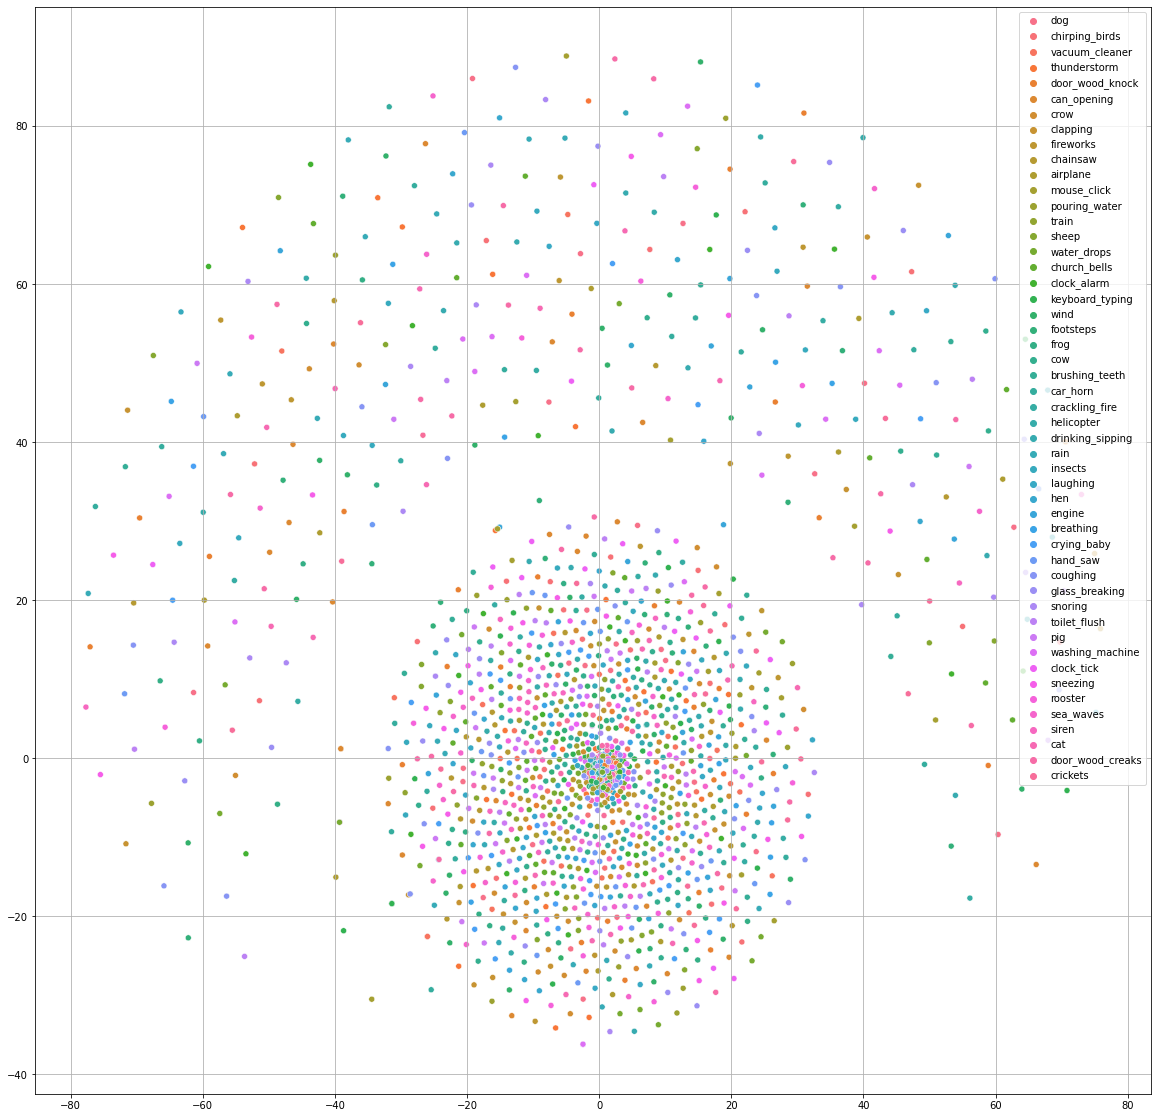

In [399]:
# Creating a list to hold the values for the names of the flowers 
speciesArr = list() 

# Getting the actual value for the names of the flowers in the species column 
for values in Y_df['encoded_value']:
  values = lb.classes_[values]
  speciesArr.append(values) 


# First plot using matplotlib 
plt.figure(figsize=(20, 20))
plt.grid(True) 


# Plotting 
sns.scatterplot(x=x_axis, y=y_axis, hue=speciesArr)

# Displaying the plot 
plt.show() 

In [398]:
# Using plotly to display the scatter plot 
fig = px.scatter(x=x_axis, y=y_axis, color=speciesArr) 

# Show the plot 
fig.show()

In [404]:
# Exporting the dataframe as a csv, and excel file 
X_df.to_csv('Xinput.csv')

# 
Y_df.to_csv('Youtput.csv')

In [394]:
# # Using label encoder 
# lb = LabelEncoder() 

# # Scaling the species column 
# df['species'] = lb.fit_transform(df['species'])
# df.pop('species_id')

# # Displaying the classes 
# print(f'Classes: {lb.classes_}') 
# !echo ""

# # Viewing the head 
# df.head() 

In [395]:
# # Getting the x-input values  
# Xinput = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Xinput.head() 

In [150]:
# # Creating a list to hold the values for the names of the flowers 
# speciesArr = list() 

# # Getting the actual value for the names of the flowers in the species column 
# for species in df['species']:
#   species = lb.classes_[species]
#   speciesArr.append(species) 

In [400]:
# First plot using matplotlib 
# plt.figure(figsize=(20, 7))
# plt.grid(True) 

# # Plotting the 2D t-sne 
# x_axis = transformed[:, 0]; 
# y_axis = transformed[:, 1]; 

# # Plotting 
# sns.scatterplot(x=x_axis, y=y_axis, hue=speciesArr)

# # Displaying the plot 
# plt.show() 